# Plotting Data Points
- This tutorial can be found at this [link](https://www.pygmt.org/latest/tutorials/basics/plot.html)
- In this tutorial, we will be plotting data-points

In [1]:
import pygmt

In [2]:
data = pygmt.datasets.load_sample_data(name="japan_quakes")

# Set the region for the plot to be slightly larger than the data bounds.
region = [
    data.longitude.min() - 1,
    data.longitude.max() + 1,
    data.latitude.min() - 1,
    data.latitude.max() + 1,
]

print(region)
print(data.head())

[131.29, 150.89, 34.02, 50.77]
   year  month  day  latitude  longitude  depth_km  magnitude
0  1987      1    4     49.77     149.29       489        4.1
1  1987      1    9     39.90     141.68        67        6.8
2  1987      1    9     39.82     141.64        84        4.0
3  1987      1   14     42.56     142.85       102        6.5
4  1987      1   16     42.79     145.10        54        5.1


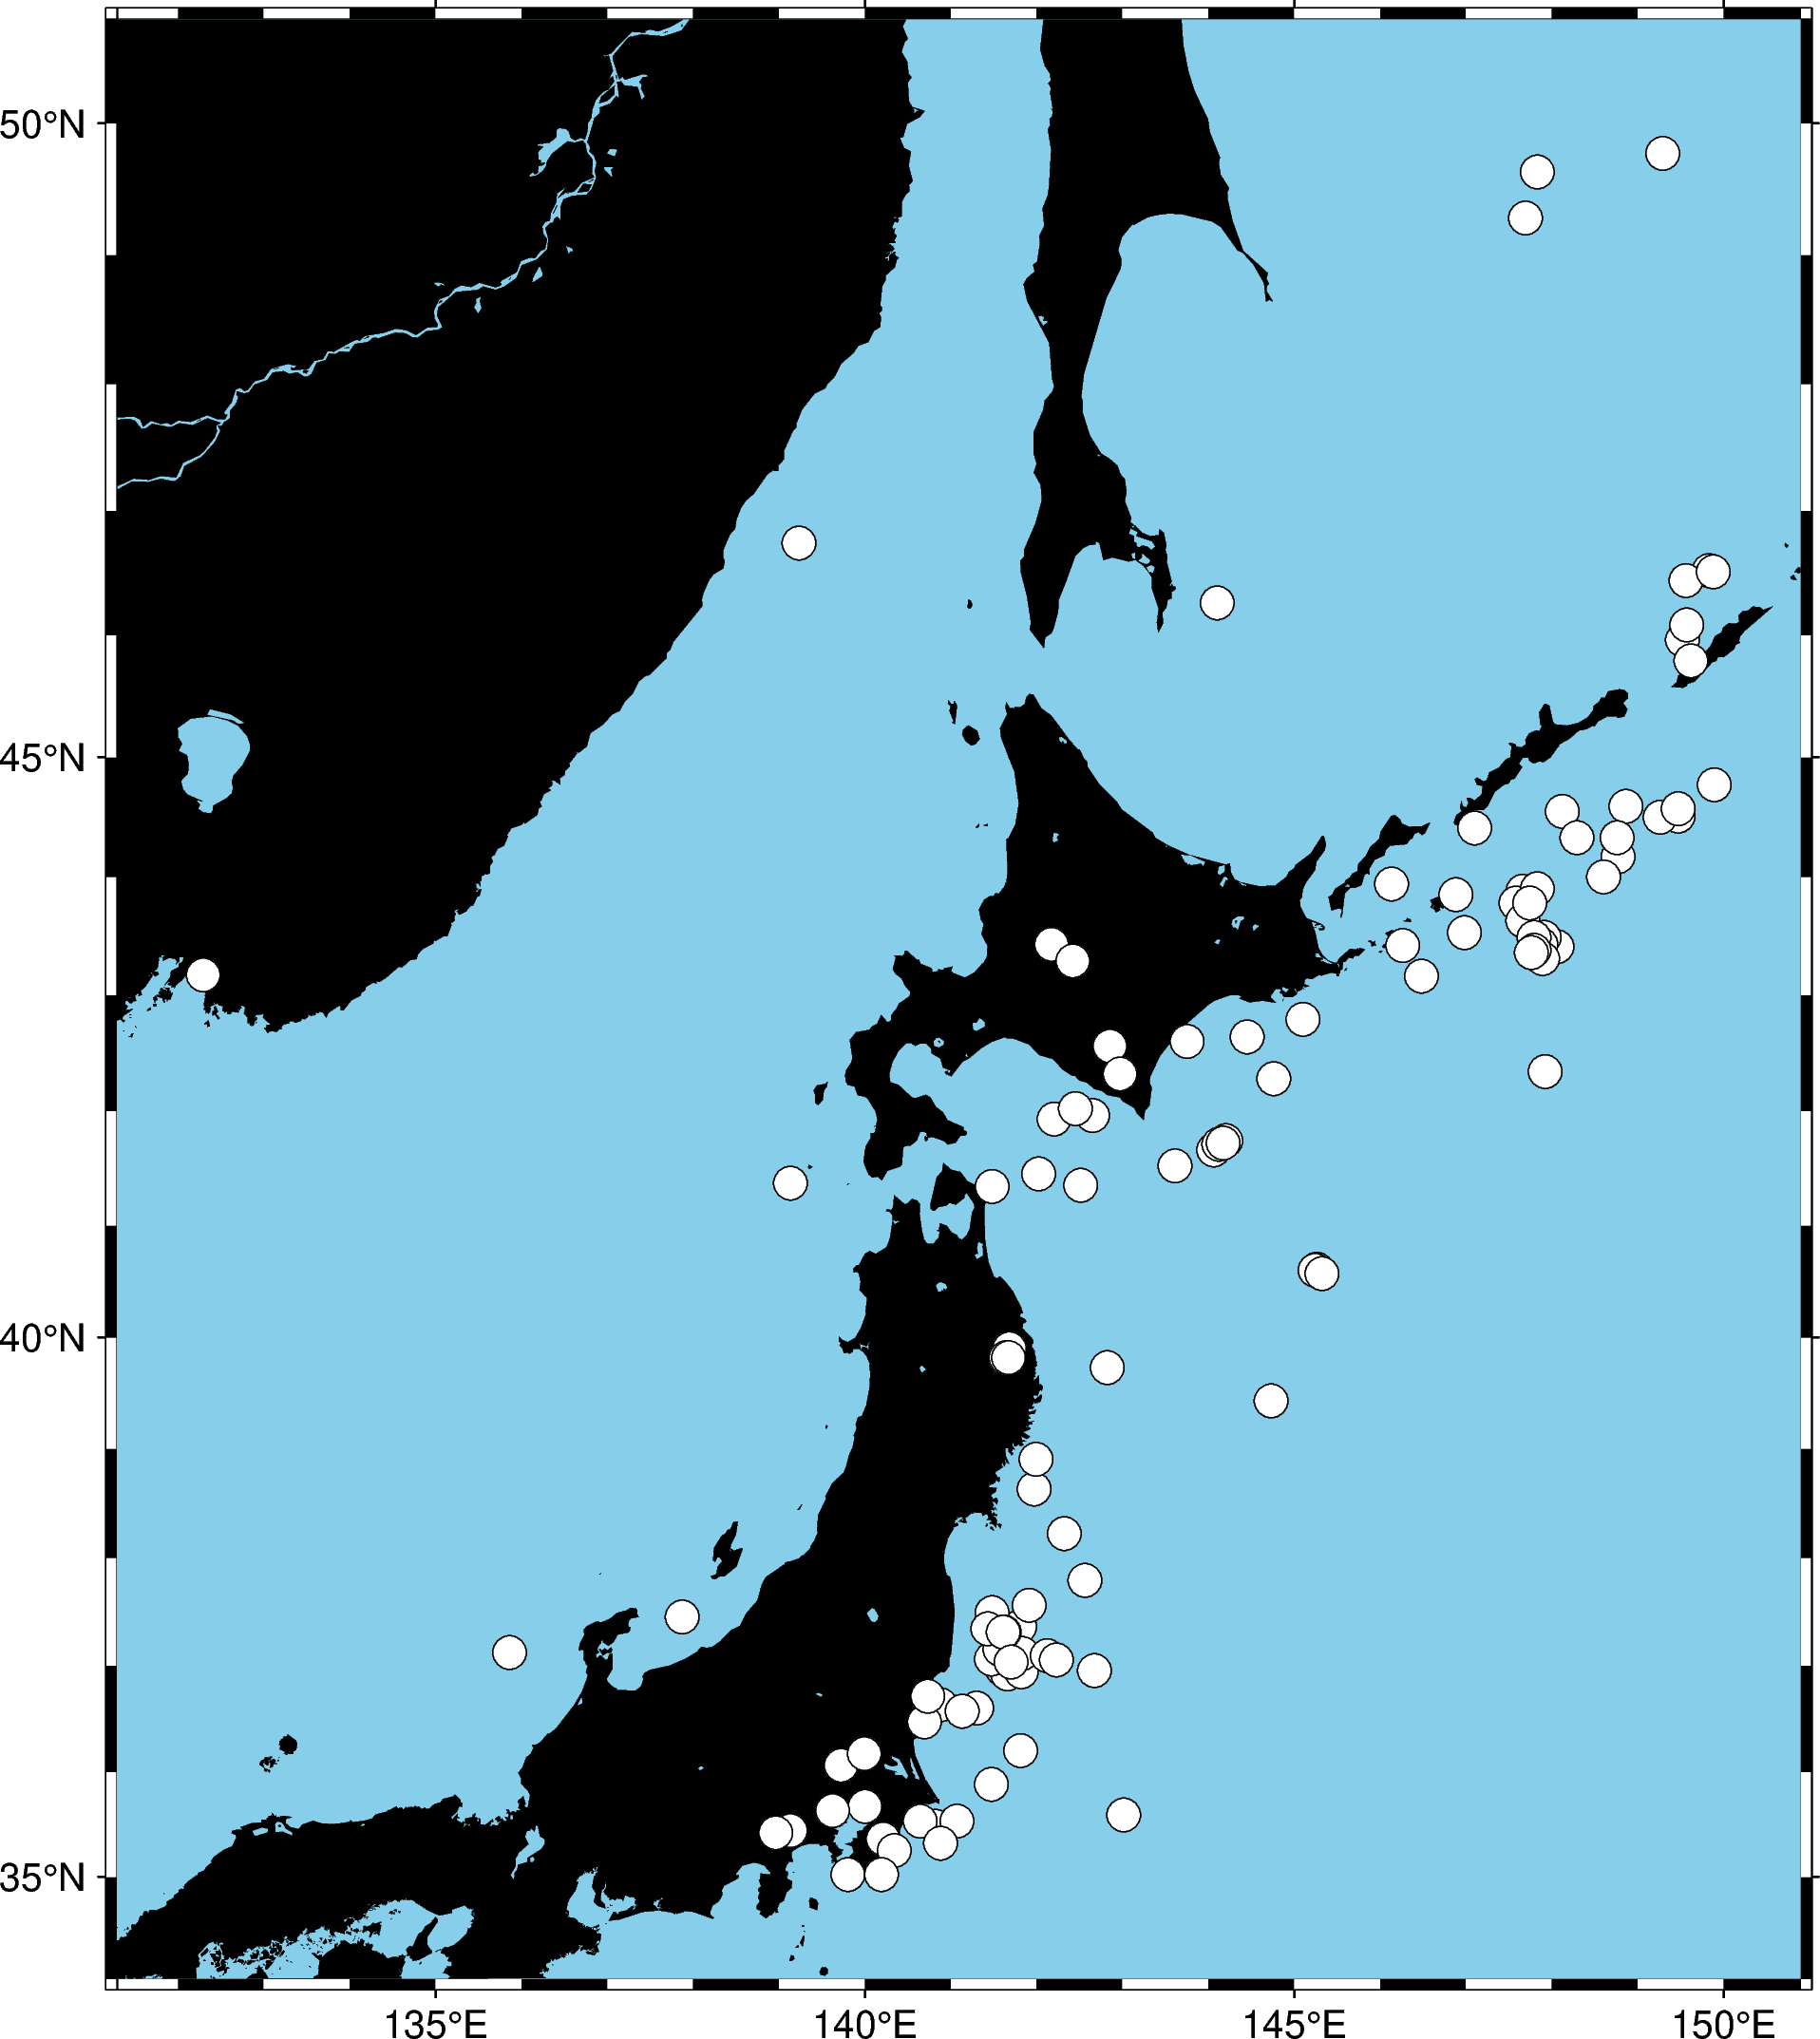

In [3]:
# Plotting circles on the Earthquake Epicenters
fig = pygmt.Figure()
fig.basemap(region = region, projection = "M15c", frame = True)
fig.coast(land = "black", water = "skyblue")
fig.plot(x=data.longitude, y=data.latitude, style="c0.3c", color="white", pen="black")
fig.show()

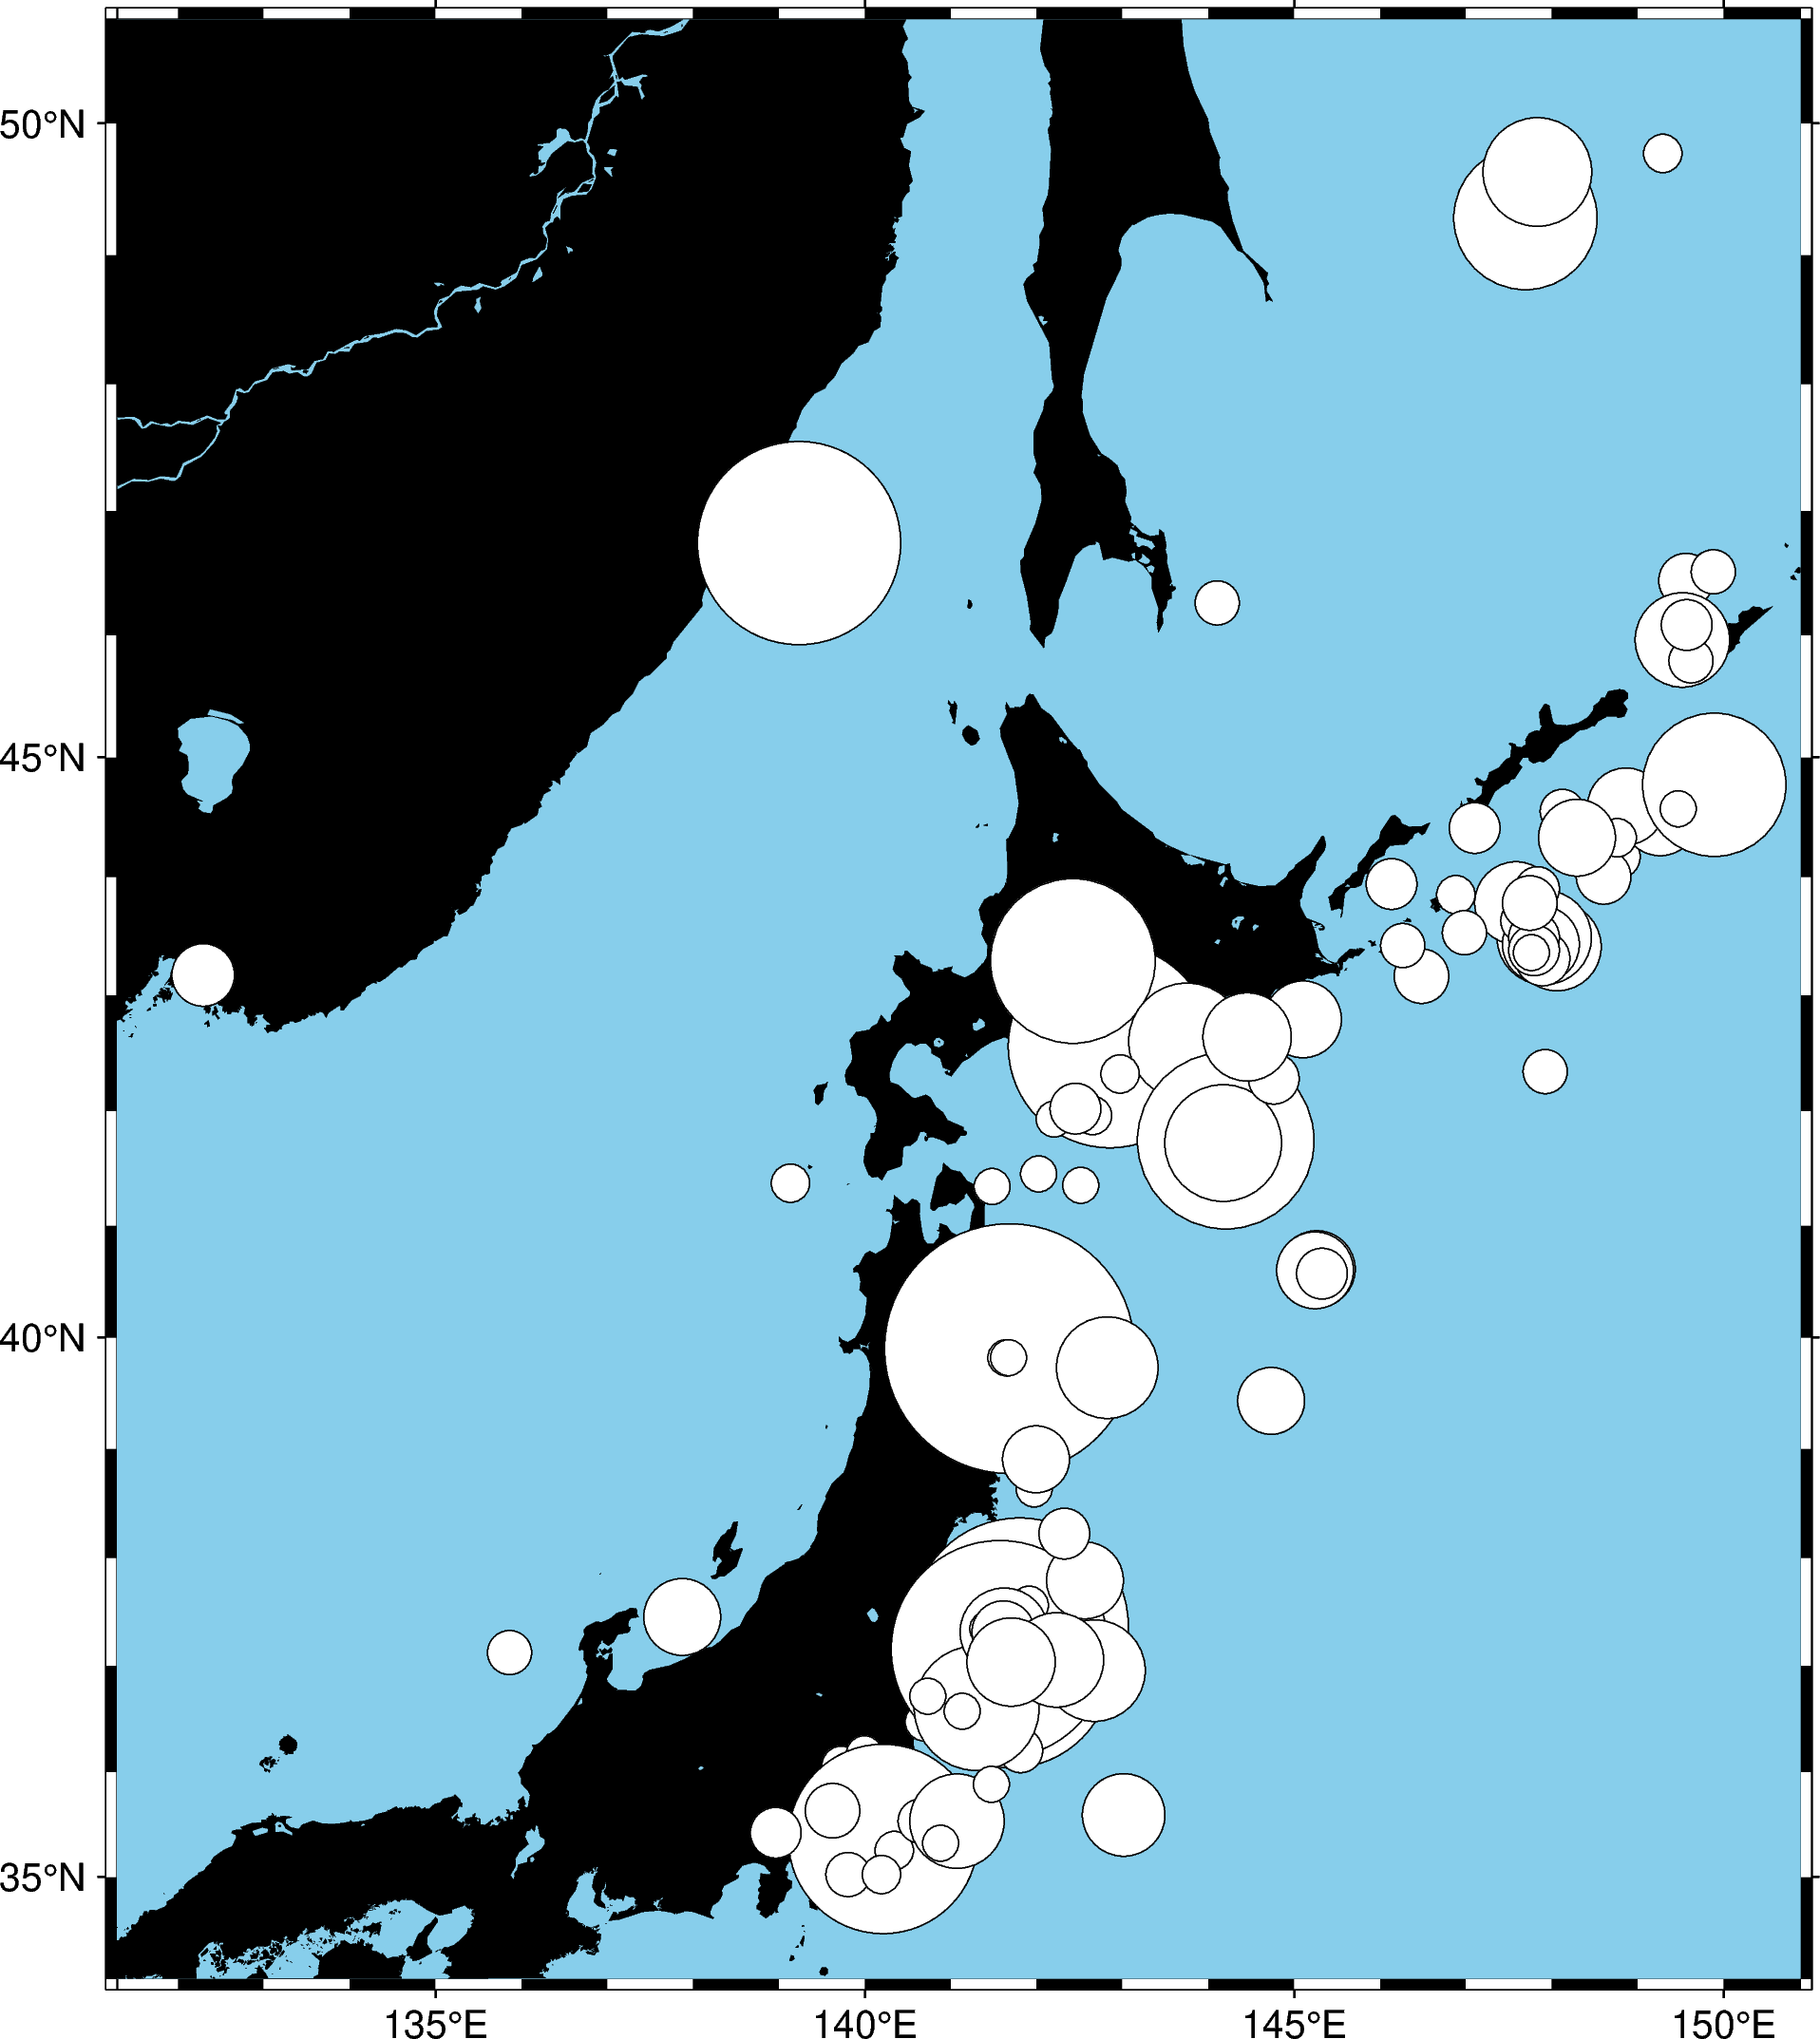

In [4]:
# Plotting circles on the Earthquake Epicenters with varying magnitudes
fig = pygmt.Figure()
fig.basemap(region = region, projection = "M15c", frame = True)
fig.coast(land = "black", water = "skyblue")
fig.plot(
  x=data.longitude, y=data.latitude, size=0.02 * (2**data.magnitude),
  style="cc", color="white", pen="black")
fig.show()

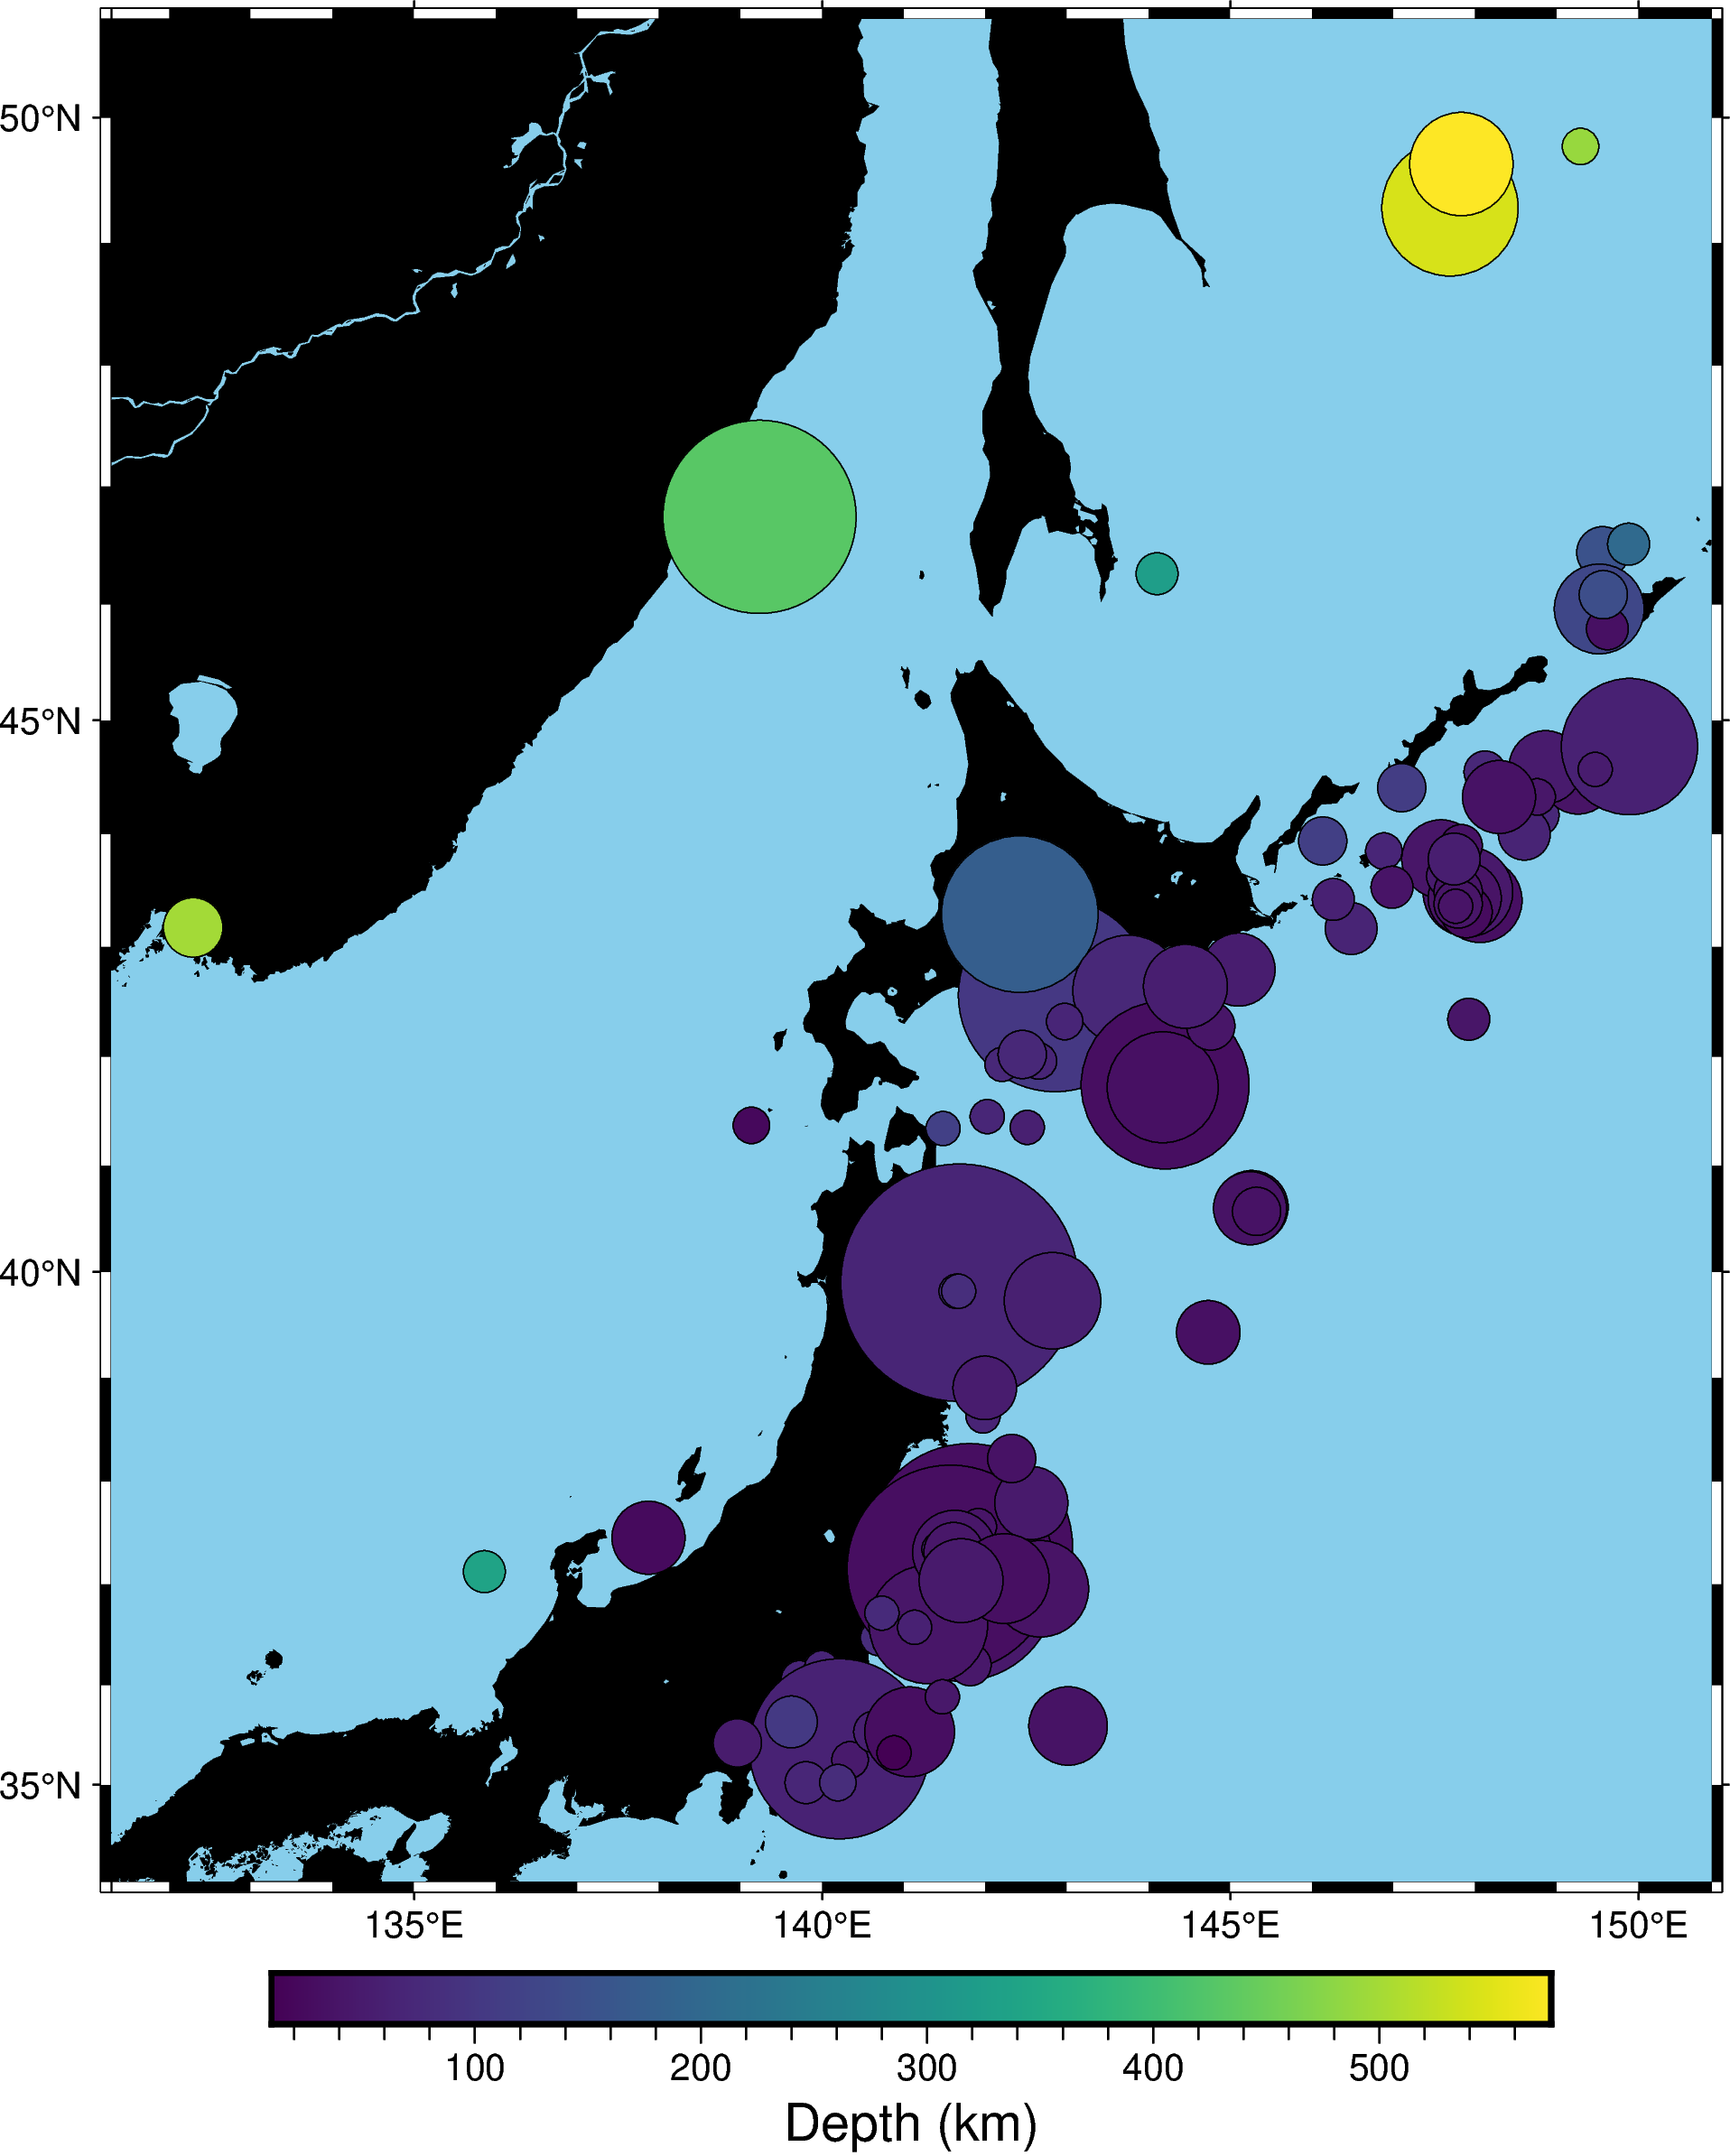

In [5]:
# Mapping the colors of the markers to the depths
fig = pygmt.Figure()
fig.basemap(region = region, projection = "M15c", frame = True)
fig.coast(land = "black", water = "skyblue")

# Making a continuous colormap
pygmt.makecpt(cmap="viridis", series=[data.depth_km.min(), data.depth_km.max()])

fig.plot(
  x = data.longitude, y = data.latitude, size = 0.02 * (2**data.magnitude),
  cmap = True, style="cc", color=data.depth_km, pen="black")

# Plotting the colorbar
fig.colorbar(frame = 'af+l"Depth (km)')
fig.show()